In [1]:
#Importing the Loan Dataset
import pandas as pd
df=pd.read_csv('loan_data.csv')
df.head()

,credit_criteria_meet,purpose,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization,inquiry_last_6months,times_surpassed_payment_in_2yrs,derogatory_public_record,loan_defaulted
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Applying Standard Scaling on Numerical Columns

In [2]:
#Separating the numerical columns for Standard Scaling.
df2=df.drop(['credit_criteria_meet','purpose','loan_defaulted','inquiry_last_6months','times_surpassed_payment_in_2yrs','derogatory_public_record'],axis=1)
df2.head()

,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
#Applying Standard Scaling
scaler=StandardScaler()
df2=pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)
df2.head()

,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586


In [5]:
#Creating separate dataframe of columns with categorical data.
df22=df[['credit_criteria_meet','purpose','loan_defaulted','inquiry_last_6months','times_surpassed_payment_in_2yrs','derogatory_public_record']]
df22.head()

,credit_criteria_meet,purpose,loan_defaulted,inquiry_last_6months,times_surpassed_payment_in_2yrs,derogatory_public_record
0,1,debt_consolidation,0,0,0,0
1,1,credit_card,0,0,0,0
2,1,debt_consolidation,0,1,0,0
3,1,debt_consolidation,0,1,0,0
4,1,credit_card,0,0,1,0


In [6]:
#Concatinating dataframes with categorical and numerical columns.
df3=pd.concat([df2,df22],axis=1)
df3.head()

,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization,credit_criteria_meet,purpose,loan_defaulted,inquiry_last_6months,times_surpassed_payment_in_2yrs,derogatory_public_record
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,1,debt_consolidation,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,1,credit_card,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,1,debt_consolidation,0,1,0,0
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,1,debt_consolidation,0,1,0,0
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,1,credit_card,0,0,1,0


In [7]:
#Creating dummies for the 'purpose' column.
df4=pd.get_dummies(data=df3,columns=['purpose'])
df4.head()

,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization,credit_criteria_meet,loan_defaulted,inquiry_last_6months,times_surpassed_payment_in_2yrs,derogatory_public_record,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,1,0,0,0,0,0,0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,1,0,0,0,0,0,1,0,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,1,0,1,0,0,0,0,1,0,0,0,0
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,1,0,1,0,0,0,0,1,0,0,0,0
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,1,0,0,1,0,0,1,0,0,0,0,0


In [8]:
#Seaprating Features and Traget variables.
X=df4.drop(['loan_defaulted'],axis=1)
Y=df4.loan_defaulted

From EDA we know that there is class imbalance in Target Variable (Loan Deafault). Now we will apply SMOTE technique to rectify it.

# Applying Smote Technique

In [9]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [10]:
print(X.shape)
print(Y.shape)

(9578, 19)
(9578,)


In [11]:
#Here we can see that there is class imbalance between class '1' and '0'.
Y.value_counts()

0    8045
1    1533
Name: loan_defaulted, dtype: int64

In [12]:
x_train_smote,y_train_smote=smote.fit_resample(X,Y)

In [13]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(16090, 19)
(16090,)


In [14]:
#Here after applying SMOTE technique we can see that there is  no class imbalance between class '1' and '0'.
y_train_smote.value_counts()

0    8045
1    8045
Name: loan_defaulted, dtype: int64

In [15]:
#Dividing the data into training and testing for model building
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train_smote,y_train_smote,train_size=0.8,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12872, 19)
(12872,)
(3218, 19)
(3218,)


# Model Building

In [16]:
# Importing required libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,BatchNormalization,Dropout
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

In [17]:
#Defining Model
model=Sequential()
model.add(Input(shape=(19,),name='Input_Layer'))
model.add(Dense(25,activation='relu',name='Hidden_Layer_1',kernel_regularizer=l2(l2=0.001)))
model.add(BatchNormalization())
model.add(Dense(55,activation='relu',name='Hidden_Layer_2',kernel_regularizer=l2(l2=0.001)))
model.add(BatchNormalization())
model.add(Dense(35,activation='relu',name='Hidden_Layer_3',kernel_regularizer=l2(l2=0.001)))
model.add(BatchNormalization())
model.add(Dense(25,activation='relu',name='Hidden_Layer_4',kernel_regularizer=l2(l2=0.001)))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid',name='Output_Layer'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 25)                500       
                                                                 
 batch_normalization (BatchN  (None, 25)               100       
 ormalization)                                                   
                                                                 
 Hidden_Layer_2 (Dense)      (None, 55)                1430      
                                                                 
 batch_normalization_1 (Batc  (None, 55)               220       
 hNormalization)                                                 
                                                                 
 Hidden_Layer_3 (Dense)      (None, 35)                1960      
                                                                 
 batch_normalization_2 (Batc  (None, 35)               1

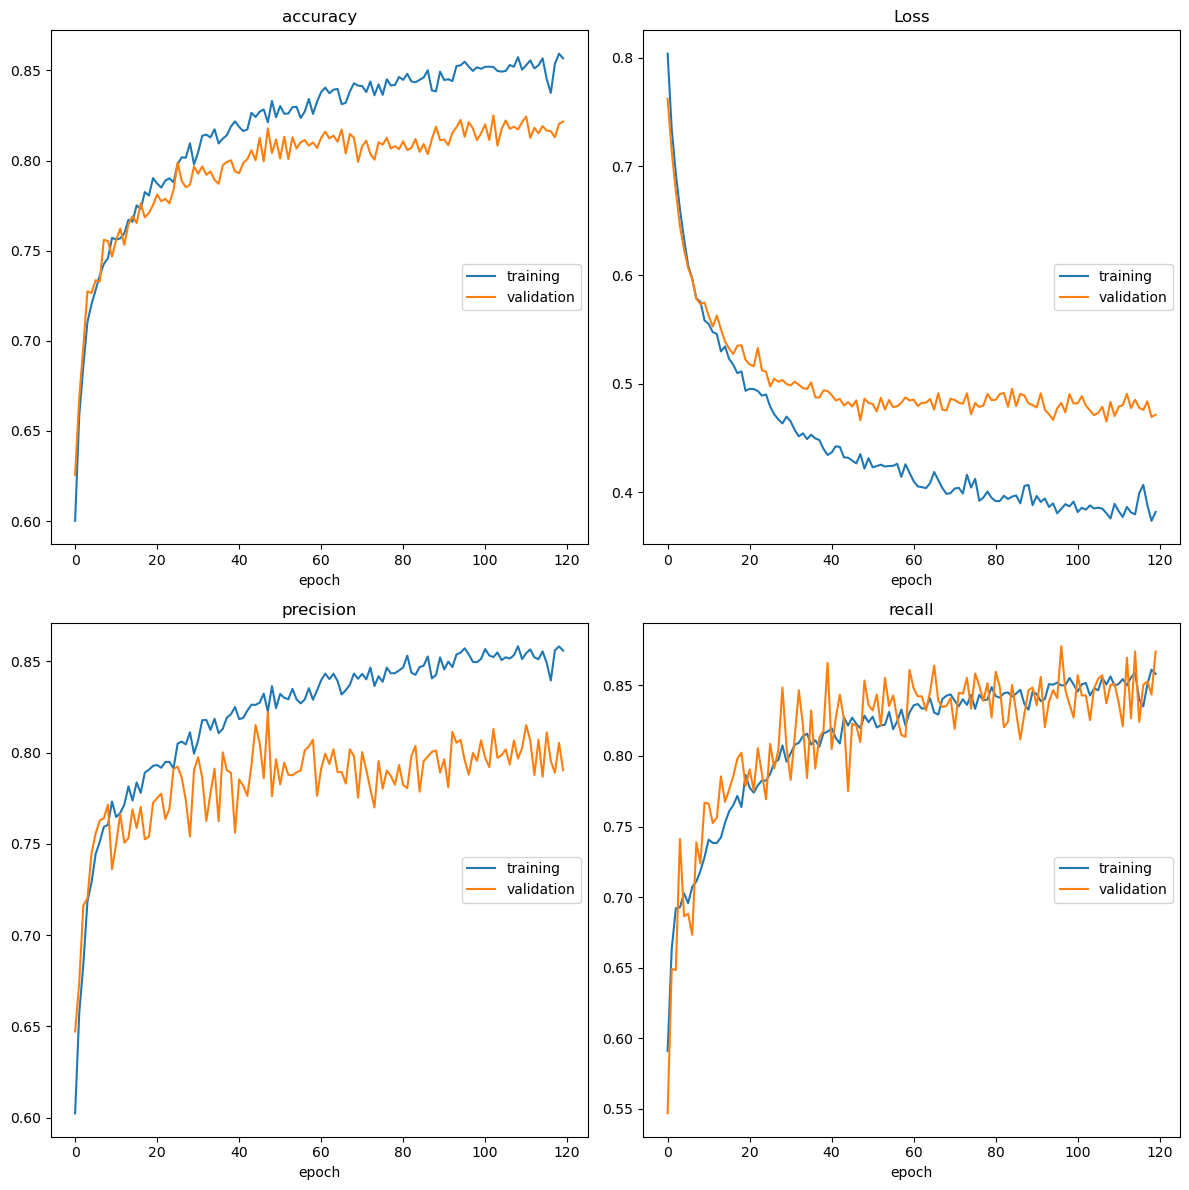

accuracy
	training         	 (min:    0.600, max:    0.859, cur:    0.857)
	validation       	 (min:    0.626, max:    0.825, cur:    0.822)
Loss
	training         	 (min:    0.374, max:    0.804, cur:    0.382)
	validation       	 (min:    0.465, max:    0.762, cur:    0.471)
precision
	training         	 (min:    0.602, max:    0.858, cur:    0.856)
	validation       	 (min:    0.647, max:    0.822, cur:    0.790)
recall
	training         	 (min:    0.591, max:    0.861, cur:    0.858)
	validation       	 (min:    0.547, max:    0.878, cur:    0.874)
202/202 [==============================] - 2s 9ms/step - loss: 0.3820 - accuracy: 0.8567 - precision: 0.8559 - recall: 0.8583 - val_loss: 0.4715 - val_accuracy: 0.8216 - val_precision: 0.7903 - val_recall: 0.8741


In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])
model.fit(x_train,y_train,epochs=120,validation_data=(x_test,y_test),batch_size=64,callbacks=[PlotLossesKerasTF()])

In [22]:
score=model.evaluate(x_test,y_test)
print('Test Loss',score[0])
print('Accuracy',score[1]*100)
print('Precision',score[2]*100)
print('Recall',score[3]*100)

101/101 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.8216 - precision: 0.7903 - recall: 0.8741
Test Loss 0.47147881984710693
Accuracy 82.16283321380615
Precision 79.030442237854
Recall 87.40648627281189


In [21]:
model.save('Loan_default.h5')

# Thus we have achieved a good accuracy of 82% in predicting whether a loan will default or not.